<a href="https://colab.research.google.com/github/Elwing-Chou/tibame_0618/blob/main/tibame_0626.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
JSON格式: [] + {}

```



In [1]:
# 進階open
f = open("a.txt", "w", encoding="utf-8")
f.write("avc")
f.close()

with open("a.txt", "w", encoding="utf-8") as f:
    f.write("abc")



```

CSV: comma-separated values
TSV: tab-separated

姓名, 身高
Elwing, 175
"Elwing, Mr. Chou", 180
```



In [ ]:
# 只有from import 可以更深入, 你可以只import你要用的功能
import json
from urllib.request import urlopen

url = "https://api.gamer.com.tw/anime/v1/danmu.php?videoSn=36632&geo=TW%2CHK"
f = urlopen(url)
content = f.read()
# print(type(content))
content_conv = json.loads(content)
# print(type(content_conv))
# content_conv: dict
# data: dict
data = content_conv["data"]
# danmus: list
danmus = data["danmu"]
# d: dict
for d in danmus:
    uid = d["userid"]
    text = d["text"]
    print(uid, text)

In [ ]:
# 只有from import 可以更深入, 你可以只import你要用的功能
import json
from urllib.request import urlopen

url = "https://api.gamer.com.tw/anime/v1/danmu.php?videoSn=36632&geo=TW%2CHK"
f = urlopen(url)
content = f.read()

content_conv = json.loads(content)
data = content_conv["data"]
danmus = data["danmu"]

f = open("baha.csv", "w", encoding="utf-8")
f.write("uid, text\n")
for d in danmus:
    uid = d["userid"]
    text = d["text"]
    print(uid, text)
    line = '"' + uid + '", "' + text + '"\n'
    f.write(line)
f.close()



```
"elwing", "好可愛"
```



In [ ]:
# 只有from import 可以更深入, 你可以只import你要用的功能
import json
import pandas as pd
from urllib.request import urlopen

url = "https://api.gamer.com.tw/anime/v1/danmu.php?videoSn=36632&geo=TW%2CHK"
f = urlopen(url)
content = f.read()

content_conv = json.loads(content)
data = content_conv["data"]
danmus = data["danmu"]

# pd.DataFrame: 表格型態
df = pd.DataFrame(danmus)
# 如果你不想存列標籤(index=False)
df.to_csv("baha2.csv", encoding="utf-8")
df.to_excel("baha.xlsx")
df

In [18]:
import urllib.request as req
import pandas as pd

url = "https://github.com/Elwing-Chou/tibame_0618/raw/refs/heads/main/baha2.csv"
req.urlretrieve(url, "baha.csv")
# 如果你有存列標籤: index_col
df = pd.read_csv("baha.csv", encoding="utf-8", index_col=0)
df

,text,color,size,position,time,sn,userid
0,二刷,#FFFFFF,1,0,0,42903755,qaz1210731
1,吉依好可愛,#FFFFFF,1,0,5,40580321,KingOrange69
2,哈嘍,#FFFFFF,1,0,5,40657118,rwan123
3,簽,#FFFFFF,1,0,5,41446388,nehsh101
4,1,#FFFFFF,1,0,5,42235007,zxc520031
...,...,...,...,...,...,...,...
494,ZMB,#FFFFFF,1,0,877,42527612,ZED8090
495,兄弟有事請轉身,#FFFFFF,1,0,890,44754781,D0690422
496,😀,#00C3FC,1,0,898,40894473,kekerry75
497,沒了？？？？,#FFFFFF,1,0,901,42188563,linzzi


In [ ]:
# 取行: 字典
df["text"]
# 取多航:
cols = ["userid", "text"]
df[cols]



```
1. 過濾
2. 轉換
```



In [ ]:
# 過濾操作: 帶入([])跟你資料筆數依樣多的True/False
# True: 留下 False: 刪除
fil = [True, False, True]
df.head(3)[fil]

In [ ]:
df["userid"].value_counts()

In [33]:
q_id = "annana566"
fil = df["userid"] == q_id
df[fil]

,text,color,size,position,time,sn,userid
130,好萌喔,#FFFFFF,1,0,191,43650216,annana566
225,喔我要不行惹,#FFFFFF,1,0,382,43650219,annana566
253,鬆餅，你好香( 。ớ ₃ờ)ھ,#FFFFFF,1,0,463,43683890,annana566
254,人類：手機先吃,#FFFFFF,1,0,463,43683900,annana566
255,這食物這算不算SM,#FFFFFF,1,0,463,43683911,annana566
349,冷知識：已結束，而且片尾很長<(˙▽˙<),#FFFFFF,1,2,643,43683942,annana566
481,所以為啥彈幕要一直兄弟的( ･᷄ὢ･᷅ )？,#FFFFFF,1,2,846,43683954,annana566


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '(-0.901, 90.1]'),
  Text(1, 0, '(90.1, 180.2]'),
  Text(2, 0, '(180.2, 270.3]'),
  Text(3, 0, '(270.3, 360.4]'),
  Text(4, 0, '(360.4, 450.5]'),
  Text(5, 0, '(450.5, 540.6]'),
  Text(6, 0, '(540.6, 630.7]'),
  Text(7, 0, '(630.7, 720.8]'),
  Text(8, 0, '(720.8, 810.9]'),
  Text(9, 0, '(810.9, 901.0]')])

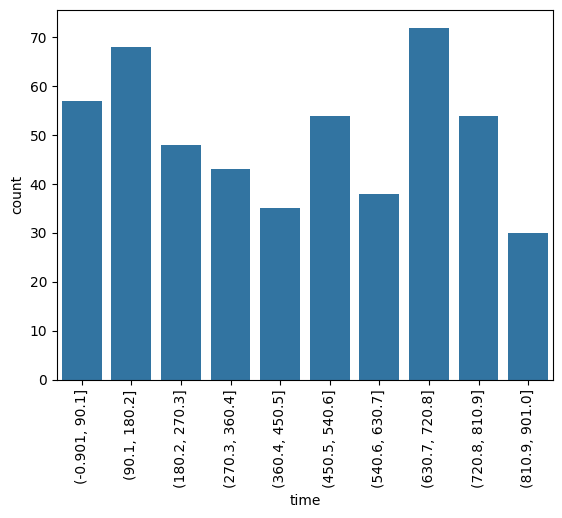

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

c = pd.cut(df["time"], bins=10)
sns.countplot(x=c)
plt.xticks(rotation=90)